# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Initial loading done")

Initial loading done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np

### Replace each question mark with the appropriate value.


# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# n_classes = len(set(y_train))
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


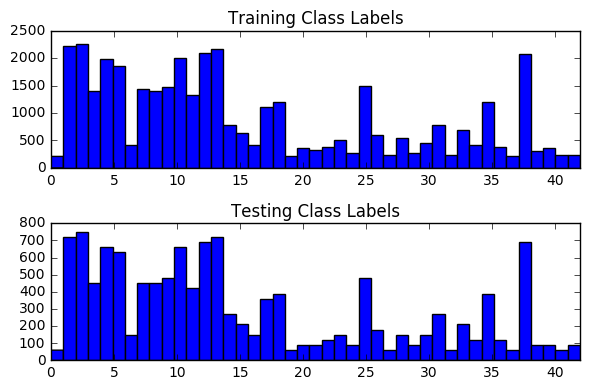

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

#visualize label distribution
plt.subplot(211).hist(y_train,43);
plt.xlim(0,42)
plt.title('Training Class Labels');
plt.subplot(212).hist(y_test,43);
plt.title('Testing Class Labels');
plt.xlim(0,42)
plt.tight_layout();

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

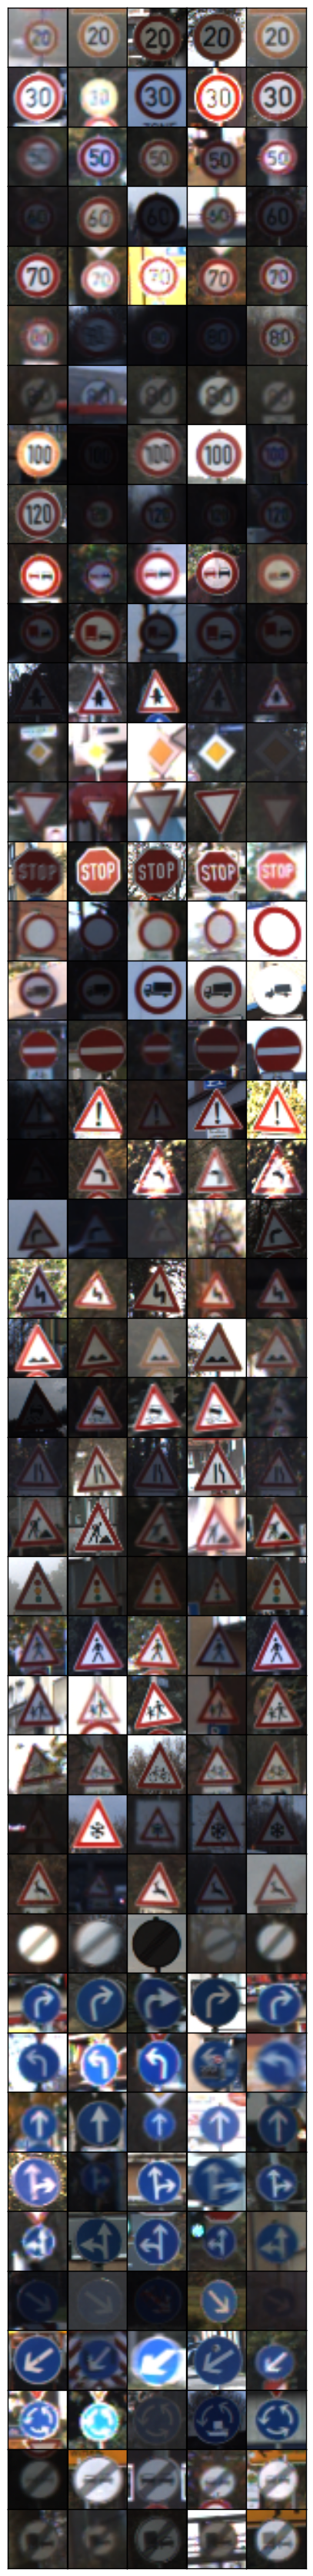

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

# With immense thanks to my great mentor Dan Wolf for helping with the 
# image plotting code that follows

sample_size = 5
count = 0
num_classes = n_classes

fig = plt.figure(figsize=(sample_size, num_classes))
grid = gridspec.GridSpec(num_classes, sample_size, wspace=0.0, hspace=0.0)

for i in range(num_classes):
    ind = y_train == i
    subset_x = X_train[ind,]
    for x in range(sample_size):
        img = random.choice(subset_x) 
        ax = plt.Subplot(fig, grid[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')
        fig.add_subplot(ax)
        count +=1
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# from sklearn.model_selection import train test split
import tensorflow as tf
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def normalize_grayscale(image_data):
    # Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    print('Grayscale applied')



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I normalized and applied a grayscale to the data by using a function featured in the earlier TensorFlow lab. My intention is to reduce data and the time necessray to process the images with grayscale, and to normalize the images so that their values are 0-1 instead of 0-255.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)

print("Training images:", X_train.shape, " labels:", y_train.shape, " classes:", n_classes)
print("Testing images:", X_test.shape, " labels:", y_test.shape, " classes:", n_classes)

Training images: (39209, 32, 32, 3)  labels: (39209,)  classes: 43
Testing images: (12630, 32, 32, 3)  labels: (12630,)  classes: 43


In [7]:
# Split for validation set
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Validation set created')

Validation set created


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I performed a validation split on the data and ran the images through a convolution neural network (described below) based heavily on the LeNet example from the lessons, with 0.969 validation accuracy. 

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 100

from tensorflow.contrib.layers import flatten
import time

def conv_net(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma ))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The network takes 32 x 32 images as input and runs them through a convolutional layer (conv1). The relu function activates the output of the convolutional layer, and is followed by a pooling layer with a 2 x 2 kernel and 2 x 2 stride to aggregate regions of the image frame. This gives us a standardized pooling output of 14 x 14 x 6.
A second convolution layer (conv2) follows, complimented by a further pooling layer which produces a 5 x 5 x 16 output. 
The network then flattens this output from the second layer into a vector, which (by multiplying 5 x 5 x 16) results in a vector of size 400. 
Layers 3, 4, and 5 are fully connected convolutional layers, including the final output layer.

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

# Windows-friendly one hot encoding
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

In [10]:
rate = 0.001

logits = conv_net(x)

# calculates the difference between the logits and training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# averages the cross-entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# AdamOptimizer minimizes the loss function (using the Adam algorithm), 
# similar to stochastic gradient descent 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        t0 = time.time()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time: %.3f seconds" % (time.time() - t0))
        print()
        
    saver.save(sess, '.\\conv_net')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.749
Time: 6.061 seconds

EPOCH 2 ...
Validation Accuracy = 0.863
Time: 2.952 seconds

EPOCH 3 ...
Validation Accuracy = 0.913
Time: 2.951 seconds

EPOCH 4 ...
Validation Accuracy = 0.936
Time: 4.048 seconds

EPOCH 5 ...
Validation Accuracy = 0.949
Time: 4.226 seconds

EPOCH 6 ...
Validation Accuracy = 0.934
Time: 4.098 seconds

EPOCH 7 ...
Validation Accuracy = 0.956
Time: 4.240 seconds

EPOCH 8 ...
Validation Accuracy = 0.964
Time: 4.189 seconds

EPOCH 9 ...
Validation Accuracy = 0.952
Time: 2.966 seconds

EPOCH 10 ...
Validation Accuracy = 0.961
Time: 3.477 seconds

EPOCH 11 ...
Validation Accuracy = 0.965
Time: 4.102 seconds

EPOCH 12 ...
Validation Accuracy = 0.973
Time: 3.648 seconds

EPOCH 13 ...
Validation Accuracy = 0.971
Time: 3.911 seconds

EPOCH 14 ...
Validation Accuracy = 0.974
Time: 2.961 seconds

EPOCH 15 ...
Validation Accuracy = 0.976
Time: 4.167 seconds

EPOCH 16 ...
Validation Accuracy = 0.967
Time: 4.176 seconds

EPOC

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I began with the parameters from the LeNet lesson, fixing batch size at 128, with 10 epochs and a learning rate of 0.001. Running the same batch size with 20 epochs brought the accuracy up to 9.63 (vs about 9.53 for 10 epochs. Increasing the learning rate to 0.01 reduced the accuracy to 0.58, so I stuck with 0.001. Lowering the batch size to 100 gave me the highest result, 0.981.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I feel I relied heavily on the examples provided in the course and a GPU marathon of trying and watching the different results. I'm happy with the acucracy however feel my intuitive understanding of the minutae of deep learning thus far is shaky. I would like to go through the entire module again to become more comfortable with the concepts and how the various stages of the process work best. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

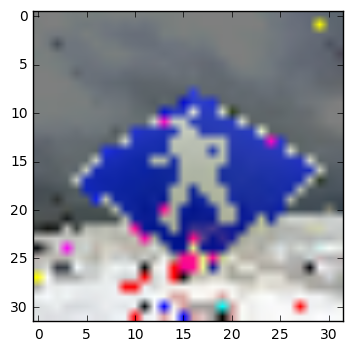

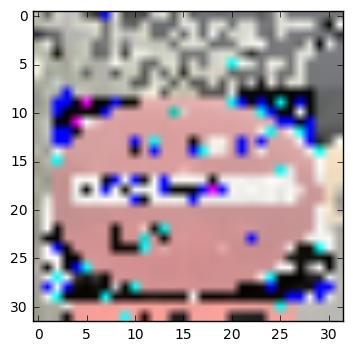

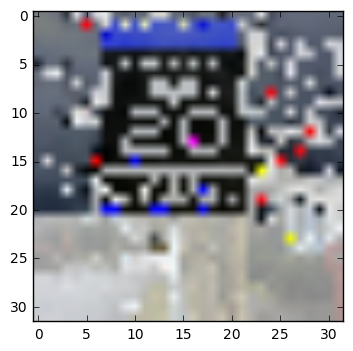

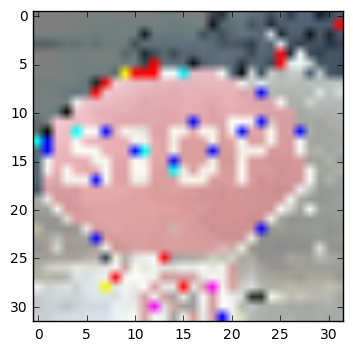

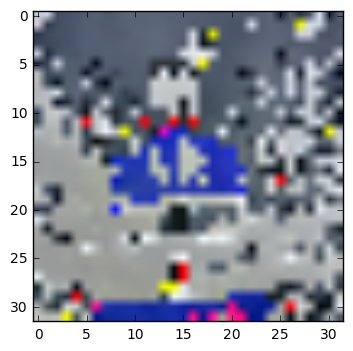

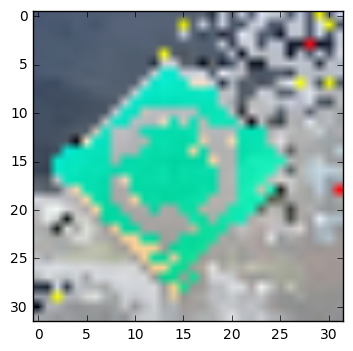

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
import cv2

def new_image_process(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32, 32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

new_images = [new_image_process("./test_images/"+name) for name in os.listdir("./test_images/")]
name_new_images = [name for name in os.listdir("./test_images/")]
new_images = np.array(new_images, dtype = np.float32)
new_labels = np.array([27., 17., 0., 14., 28.,40.], np.float)

for image in new_images:
    plt.imshow(image)
    plt.show()
    



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I was dissapointed with an initial accuracy of 0.333. After adding 16 images of a U.S. stop sign taken from slightly different angles, I improved the score to 0.346. A sobering example of the amount of data necessary to train effectively. 

I imagine one problem may be that I took these photos in my Seattle neighborhood, and that the signs will differ from the German traffic sign set. Most images were also taken on an overcast day, which may make them less clear. Here's to more experimentation! Since some of the signs were fairly elevated, perhaps the angle at which the pictures were taken make the learning task difficult. I would like to triple the number of images in the set (with more photos of similar signs) in the hope of improving accuracy.

In [34]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def one_hot(new_labels, n_classes):
    with tf.device('/cpu:0'):
        one_hot = tf.one_hot(new_labels, n_classes, dtype=np.float32)
    return one_hot 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    one_hot_new_labels = one_hot(new_labels, n_classes)
 
    test_accuracy = evaluate(new_images, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    


Test Accuracy = 0.333


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I'm hitting an accuracy of 33%. I'll keep trying. I'd like to get ahold of some German traffic sign photos to test the network, and experiment with different pre-processing techniques.

In [35]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top_k_predictions = sess.run(tf.nn.top_k(tf.constant(new_images), k=3))

    print(top_k_predictions)


TopKV2(values=array([[[[ 0.5       ,  0.5       ,  0.49607843],
         [ 0.5       ,  0.5       ,  0.5       ],
         [ 0.5       ,  0.5       ,  0.5       ],
         ..., 
         [ 0.45686275,  0.4137255 ,  0.38235295],
         [ 0.44117647,  0.40196079,  0.36274511],
         [ 0.43725491,  0.40196079,  0.36666667]],

        [[ 0.49607843,  0.49215686,  0.48039216],
         [ 0.5       ,  0.5       ,  0.5       ],
         [ 0.5       ,  0.5       ,  0.49607843],
         ..., 
         [ 0.00196078, -0.01764706, -0.02156863],
         [ 0.44901961,  0.4137255 ,  0.37843138],
         [ 0.43333334,  0.39803922,  0.36274511]],

        [[ 0.5       ,  0.49607843,  0.48823529],
         [ 0.49607843,  0.48431373,  0.46470588],
         [ 0.5       ,  0.47647059,  0.45686275],
         ..., 
         [ 0.46470588,  0.41764706,  0.39411765],
         [ 0.45294118,  0.4137255 ,  0.38627452],
         [ 0.43333334,  0.39411765,  0.36666667]],

        ..., 
        [[-0.04901961

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
If I'm correct that image classes (for the self-provided test set) in the array [1, 2, 0] correspond to STOP, 20KMH/MPH, and PEDESTRIANS, then STOP and PEDESTRIANS seems accurate, since there were two such images in the set. There was just one '20' in the set. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.